<a href="https://colab.research.google.com/github/SciMathist/CV_QNN_FunctionFitting/blob/main/Pennylane_CVQNN_Fit_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [ ]:
!pip install pennylane-sf

INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/

# **Import Library**

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, QNGOptimizer

import matplotlib.pyplot as plt
import pandas as pd


# **Continuous Variable Quantum Neural Network : Function Fitting**

## Load Data
Either load ***Noisy Sine*** data or ***Noisy Tanh*** data for running the experiment.


### Noisy Sine

**Noisy Sine:** Run the following two cells to download and load noisy data samples
of a `sine function` from the external file
`sine.txt`

In [ ]:
!wget https://raw.githubusercontent.com/XanaduAI/pennylane/v0.3.0/examples/data/sine.txt

--2024-08-23 05:31:33--  https://raw.githubusercontent.com/XanaduAI/pennylane/v0.3.0/examples/data/sine.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2547 (2.5K) [text/plain]
Saving to: ‘sine.txt’

sine.txt            100%[===================>]   2.49K  --.-KB/s    in 0s      

2024-08-23 05:31:34 (33.3 MB/s) - ‘sine.txt’ saved [2547/2547]



In [ ]:
data = np.loadtxt("sine.txt")
X = np.array(data[:, 0], requires_grad=False)
Y = np.array(data[:, 1], requires_grad=False)


### Noisy Tanh

**Noisy Tanh:** Run the following two cells to generate and load noisy data samples of a `tanh function`


In [ ]:
def tanh_function(x, eps=0.0):
    """The function f(x)=tanh(4x)+noise"""
    return np.tanh(4*x) + eps * np.random.normal(size=x.shape)

In [ ]:
X = np.linspace(-1, 1, 50)
Y = tanh_function(X, 0.1)

## Visualizing the data

In [ ]:
print(X, Y)

[-0.11268649 -0.33012851  0.54373733  0.80704866  0.55538057 -0.54107054
  0.18935581  0.96781585 -0.41327059  0.74415499  0.44696605 -0.61363691
  0.46700535 -0.46362292 -0.41446341  0.89264975 -0.47079991 -0.2955473
  0.44892779  0.53951118 -0.29307285 -0.44140687 -0.8658363  -0.46238505
 -0.79031102  0.45223883  0.55915356 -0.27292549  0.50598212 -0.54465434
  0.20336814 -0.06167003  0.57968508 -0.76169877  0.89485069  0.55135851
  0.64914088 -0.79001714  0.23949858  0.0867956  -0.74334397 -0.13825349
  0.39121447  0.00496675 -0.67400404  0.77653034  0.89483284 -0.51471674
  0.09288003  0.09092684] [-0.37081591 -0.77924274  1.05409834  0.53224175  0.97488816 -1.08804846
  0.47345265 -0.13025887 -0.86243346  0.69133779  0.97059487 -0.96927114
  0.97947162 -1.06703581 -1.07303169  0.45133802 -0.907055   -0.81055677
  0.99129209  0.74974948 -0.87752789 -1.03524247 -0.50259292 -1.018235
 -0.61669492  0.99076331  1.29371372 -0.7150979   1.25514237 -0.89357659
  0.70778866  0.03920109  0.

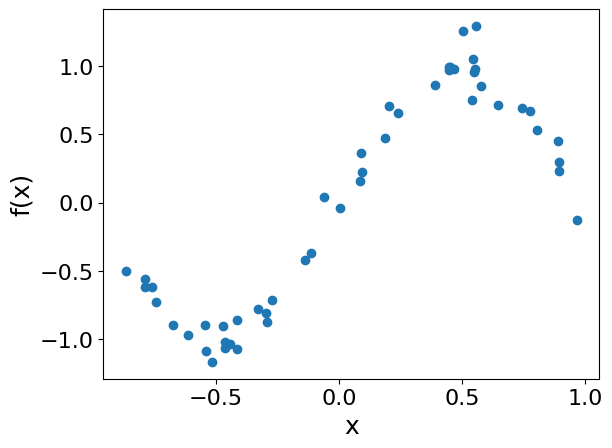

In [ ]:
plt.figure()
plt.scatter(X, Y)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()

## Define Device

using strawberryfields.fork device for returning continuous variable quantum fork state

In [ ]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

## Define Continuous Variable Quantum Neural Network
### Quantum Layer

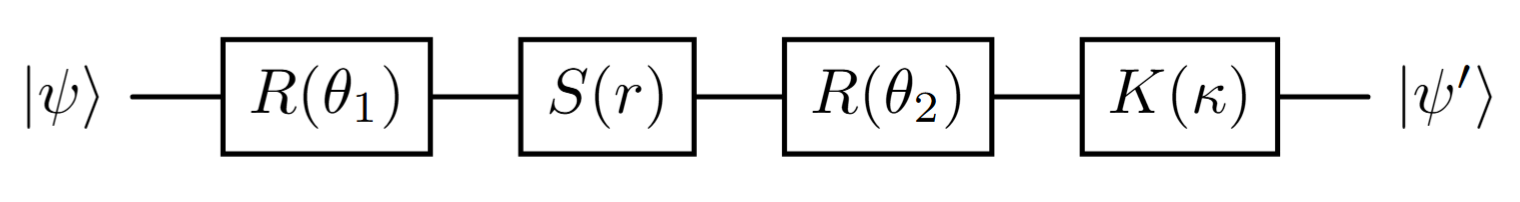

In [ ]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    # Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

### Combining Quantum Layer into Quantum Neural Network
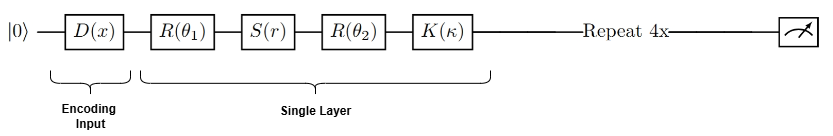

In [ ]:
@qml.qnode(dev)
def quantum_neural_net(var, x):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

### Cost Function

using Mean Square Error

<img src="https://miro.medium.com/max/1400/0*oxg81Sl5QDauFysz">

In [ ]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [ ]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x) for x in features]
    return square_loss(labels, preds)

## Parameters Initialization
4x5 Matrix of 4 layers 5 gate QNN

In [ ]:
np.random.seed(0)
num_layers = 4
var_init = 0.05 * np.random.randn(num_layers, 5)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]]


## Before Training

In [ ]:
var = var_init
x_pred = np.linspace(-1, 1, 50)
predictions = [quantum_neural_net(var, x_) for x_ in x_pred]

print("Mean square error : ", cost(var, X, Y))

Mean square error :  0.3006064868173771


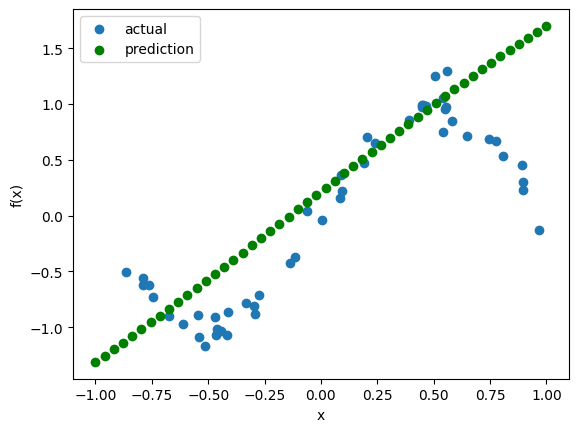

In [ ]:
plt.figure()
plt.scatter(X, Y, label= "actual")
plt.scatter(x_pred, predictions, color="green", label = "prediction")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.legend()
plt.show()

## Training QNN

In [ ]:
opt = AdamOptimizer(0.01)

loss_plot = []

var = var_init
for it in range(100):
    var, _cost = opt.step_and_cost(lambda v: cost(v, X, Y), var)
    loss_plot.append(_cost)
    print("Iter: {:5d} | Cost: {:0.7f} ".format(it, _cost))

Iter:     0 | Cost: 0.3006065 
Iter:     1 | Cost: 0.2103589 
Iter:     2 | Cost: 0.1591567 
Iter:     3 | Cost: 0.1548506 
Iter:     4 | Cost: 0.1705307 
Iter:     5 | Cost: 0.1730701 
Iter:     6 | Cost: 0.1621266 
Iter:     7 | Cost: 0.1472967 
Iter:     8 | Cost: 0.1358056 
Iter:     9 | Cost: 0.1297992 
Iter:    10 | Cost: 0.1271500 
Iter:    11 | Cost: 0.1241824 
Iter:    12 | Cost: 0.1182249 
Iter:    13 | Cost: 0.1087253 
Iter:    14 | Cost: 0.0972946 
Iter:    15 | Cost: 0.0869784 
Iter:    16 | Cost: 0.0806068 
Iter:    17 | Cost: 0.0787040 
Iter:    18 | Cost: 0.0787929 
Iter:    19 | Cost: 0.0774856 
Iter:    20 | Cost: 0.0733219 
Iter:    21 | Cost: 0.0673816 
Iter:    22 | Cost: 0.0618423 
Iter:    23 | Cost: 0.0582142 
Iter:    24 | Cost: 0.0564126 
Iter:    25 | Cost: 0.0551137 
Iter:    26 | Cost: 0.0530068 
Iter:    27 | Cost: 0.0498229 
Iter:    28 | Cost: 0.0463512 
Iter:    29 | Cost: 0.0436536 
Iter:    30 | Cost: 0.0422183 
Iter:    31 | Cost: 0.0416666 
Iter:   

In [ ]:
plt.figure()
plt.plot(loss_plot)
plt.xlabel("Iter")
plt.ylabel("Cost")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

NameError: name 'loss_plot' is not defined

<Figure size 640x480 with 0 Axes>

## Evaluate

In [ ]:
x_pred = np.linspace(-1, 1, 50)
predictions = [quantum_neural_net(var, x_) for x_ in x_pred]

print("Mean square error : ", cost(var, X, Y))

Mean square error :  0.3006064868173771


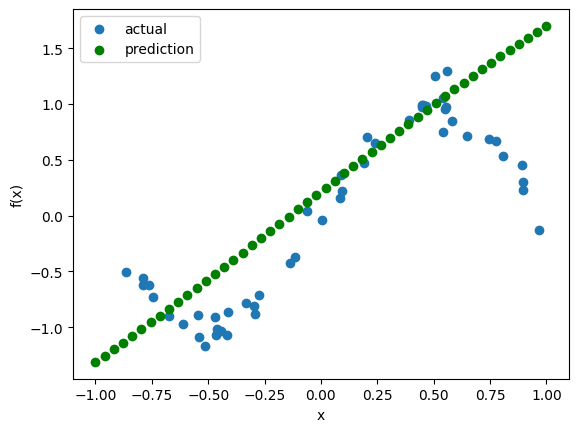

In [ ]:
plt.figure()
plt.scatter(X, Y, label= "actual")
plt.scatter(x_pred, predictions, color="green", label = "prediction")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.legend()
plt.show()